#Análisis Exploratorio de Datos

##Instalación e importación de paquetes y librerias


In [ ]:
install.packages("IRkernel")
install.packages("tidyverse")
install.packages("RColorBrewer")
install.packages("corrplot")
install.packages("psych")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("gtools")
install.packages("ggfortify")
install.packages("GGally")
install.packages("readr")
install.packages("readxl")
install.packages("knitr")
install.packages("modelr")
install.packages("scales")
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

In [ ]:
library(IRkernel)
library(tidyverse)
library(RColorBrewer)
library(corrplot)
library(psych)
library(dplyr)
library(ggplot2)
library(gtools)
library(ggfortify)
library(GGally)
library(readr)
library(readxl)
library(knitr)
library(modelr)
library(reshape2)
library(scales)
install.packages("conflicted")
library(conflicted)
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::lag over any other package.


##Ames Housing Raw Data

In [ ]:
# URL del archivo CSV
url <- "https://raw.githubusercontent.com/FerMarz/ames-housing-2023/main/data/AmesHousing_raw_data.csv"

# Leer el archivo CSV
df <- read.csv(url)

# Mostrando las primeras filas
head(df)

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,⋯,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500


#Analisis de la base

In [ ]:
#Desactivar notacion cientifica
options(scipen = 100)

# Ver datos faltantes
na_count <-sapply(df, function(df) sum(length(which(is.na(df)))))
na_count

Order             PID     MS.SubClass       MS.Zoning    Lot.Frontage 
              0               0               0               0             490 
       Lot.Area          Street           Alley       Lot.Shape    Land.Contour 
              0               0            2732               0               0 
      Utilities      Lot.Config      Land.Slope    Neighborhood     Condition.1 
              0               0               0               0               0 
    Condition.2       Bldg.Type     House.Style    Overall.Qual    Overall.Cond 
              0               0               0               0               0 
     Year.Built  Year.Remod.Add      Roof.Style       Roof.Matl    Exterior.1st 
              0               0               0               0               0 
   Exterior.2nd    Mas.Vnr.Type    Mas.Vnr.Area      Exter.Qual      Exter.Cond 
              0               0              23               0               0 
     Foundation       Bsmt.Qual       Bsmt.Cond   Bsmt.Exposure  BsmtFin.Type.1 
              0              79              79              79              79 
   BsmtFin.SF.1  BsmtFin.Type.2    BsmtFin.SF.2     Bsmt.Unf.SF   Total.Bsmt.SF 
              1              79               1               1               1 
        Heating      Heating.QC     Central.Air      Electrical     X1st.Flr.SF 
              0               0               0               0               0 
    X2nd.Flr.SF Low.Qual.Fin.SF     Gr.Liv.Area  Bsmt.Full.Bath  Bsmt.Half.Bath 
              0               0               0               2               2 
      Full.Bath       Half.Bath   Bedroom.AbvGr   Kitchen.AbvGr    Kitchen.Qual 
              0               0               0               0               0 
  TotRms.AbvGrd      Functional      Fireplaces    Fireplace.Qu     Garage.Type 
              0               0               0            1422             157 
  Garage.Yr.Blt   Garage.Finish     Garage.Cars     Garage.Area     Garage.Qual 
            159             157               1               1             158 
    Garage.Cond     Paved.Drive    Wood.Deck.SF   Open.Porch.SF  Enclosed.Porch 
            158               0               0               0               0 
    X3Ssn.Porch    Screen.Porch       Pool.Area         Pool.QC           Fence 
              0               0               0            2917            2358 
   Misc.Feature        Misc.Val         Mo.Sold         Yr.Sold       Sale.Type 
           2824               0               0               0               0 
 Sale.Condition       SalePrice 
              0               0

In [44]:
summary(df)

  ms_subclass        ms_zoning      lot_frontage        lot_area      
 Min.   :-0.8770   Min.   :0.000   Min.   :-1.7212   Min.   :-1.1230  
 1st Qu.:-0.8770   1st Qu.:5.000   1st Qu.:-0.4373   1st Qu.:-0.3437  
 Median :-0.1733   Median :5.000   Median : 0.1598   Median :-0.0903  
 Mean   : 0.0000   Mean   :4.967   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.2959   3rd Qu.:5.000   3rd Qu.: 0.6076   3rd Qu.: 0.1786  
 Max.   : 3.1107   Max.   :6.000   Max.   : 7.6239   Max.   :26.0319  
     street           alley         lot_shape     land_contour  
 Min.   :0.0000   Min.   :0.000   Min.   :0.00   Min.   :0.000  
 1st Qu.:1.0000   1st Qu.:2.000   1st Qu.:0.00   1st Qu.:3.000  
 Median :1.0000   Median :2.000   Median :3.00   Median :3.000  
 Mean   :0.9959   Mean   :1.891   Mean   :1.94   Mean   :2.778  
 3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:3.00   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :2.000   Max.   :3.00   Max.   :3.000  
   utilities          lot_config      land_slope

#Cantidad de columnas y tipos de datos

In [43]:
# Cantidad de columnas e instancias
num_columns <- ncol(df)
num_instances <- nrow(df)
cat("Cantidad de columnas:", num_columns, "\n")
cat("Cantidad de instancias:", num_instances, "\n")

# Tipo de dato de cada columna
data_types <- sapply(df, class)
print(data_types)


Cantidad de columnas: 79 
Cantidad de instancias: 2930 
    ms_subclass       ms_zoning    lot_frontage        lot_area          street 
      "numeric"       "integer"       "numeric"       "numeric"       "integer" 
          alley       lot_shape    land_contour       utilities      lot_config 
      "integer"       "integer"       "integer"       "integer"       "integer" 
     land_slope    neighborhood     condition_1     condition_2       bldg_type 
      "integer"       "integer"       "integer"       "integer"       "integer" 
    house_style    overall_qual    overall_cond      year_built  year_remod.add 
      "integer"       "numeric"       "numeric"       "numeric"       "numeric" 
     roof_style       roof_matl    exterior_1st    exterior_2nd    mas_vnr_type 
      "integer"       "integer"       "integer"       "integer"       "integer" 
   mas_vnr_area      exter_qual      exter_cond      foundation       bsmt_qual 
      "numeric"       "integer"       "integer"      

In [ ]:
# Cantidad de columnas por tipo de dato
columns_by_type <- table(sapply(df, class))
print(columns_by_type)

#Creacion de dataFrame para valores numericos
numeric = df %>% select(where(is.numeric))


character   integer 
       43        39 


Saving 6.67 x 6.67 in image


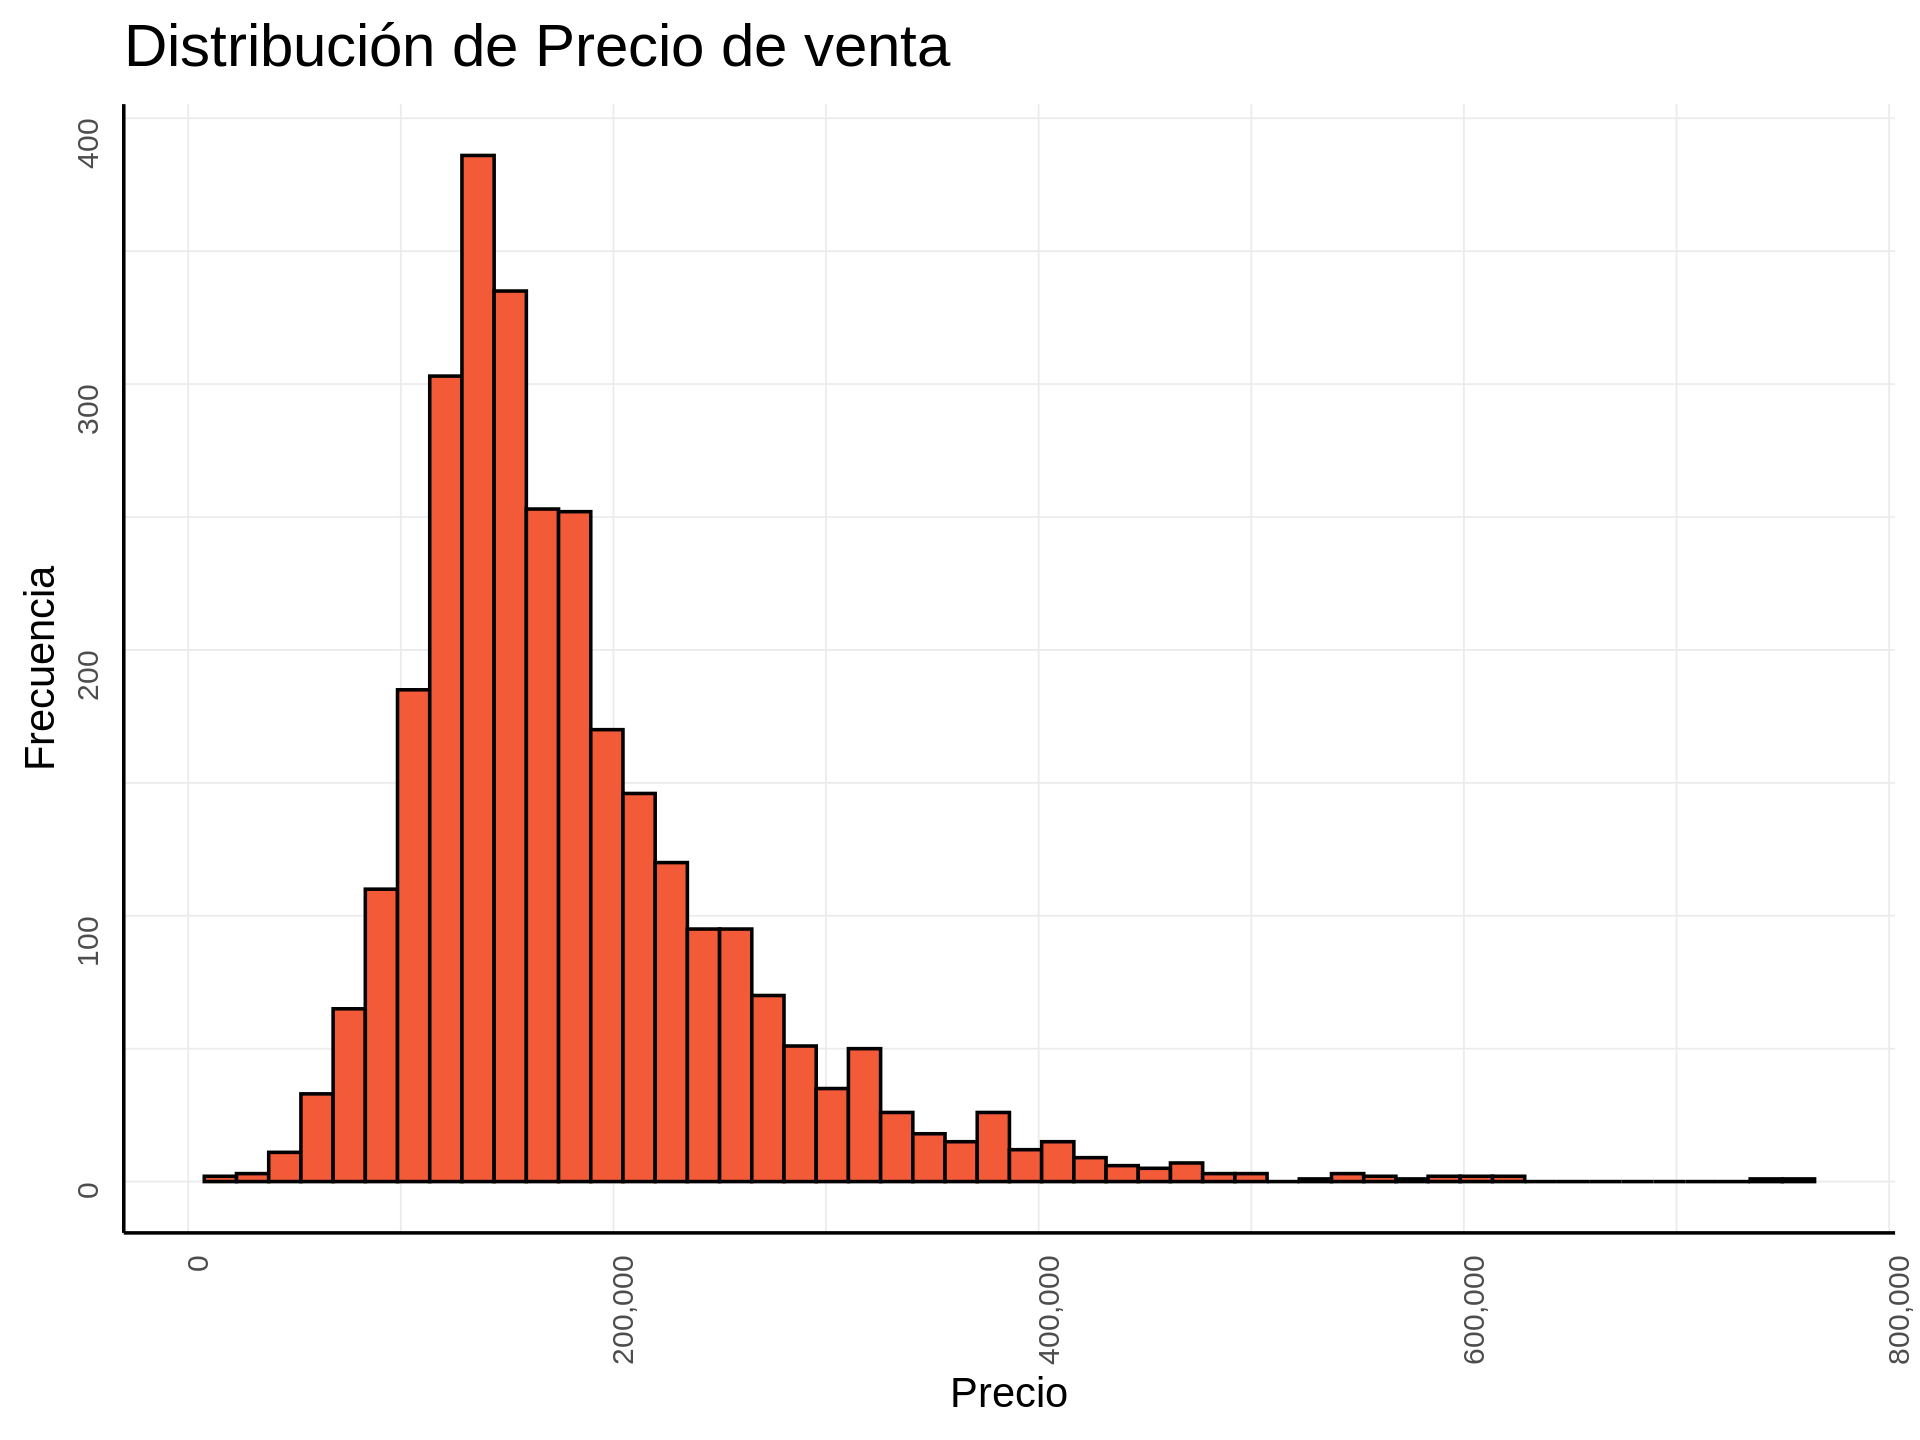

In [45]:
# Establecer DPI
dpi <- 300
options(repr.plot.width = 16, repr.plot.height = 12)

# Cargar paquetes necesarios
library(ggplot2)
library(scales)  # Ensure that the scales package is loaded

# Crear el histograma con ggplot2
ggplot(df, aes(x = sale_price)) +
  geom_histogram(color = "black", fill = "#F25A38", bins = 50, size = 1) +
  scale_x_continuous(labels = comma) +  # Use comma directly if scales package is loaded
  labs(title = "Distribución de Precio de venta", x = "Precio", y = "Frecuencia") +
  theme_minimal(base_size = 30) +
  theme(
    axis.title.x = element_text(size = 25),
    axis.title.y = element_text(size = 25),
    axis.text = element_text(size = 18, angle = 90, vjust = 0.5, hjust = 1),
    axis.line = element_line(size = 1),
    panel.grid.major = element_line(size = 0.5),
    panel.grid.minor = element_line(size = 0.5)
  )

# Guardar el gráfico en un archivo PNG con el DPI especificado
ggsave("histograma_saleprice.png", dpi = dpi, bg = "white")

#Cantidad de datos faltantes por columnas

In [47]:
# Contar la cantidad de datos faltantes en cada columna
missing_data_count <- colSums(is.na(df))

# Filtrar y mostrar solo las columnas que tienen datos faltantes
missing_data_count <- missing_data_count[missing_data_count > 0]

print("Cantidad de datos faltantes por columna:")
print(missing_data_count)

[1] "Cantidad de datos faltantes por columna:"
named numeric(0)


#Relacion entre variables mas correlacionadas

Saving 6.67 x 6.67 in image


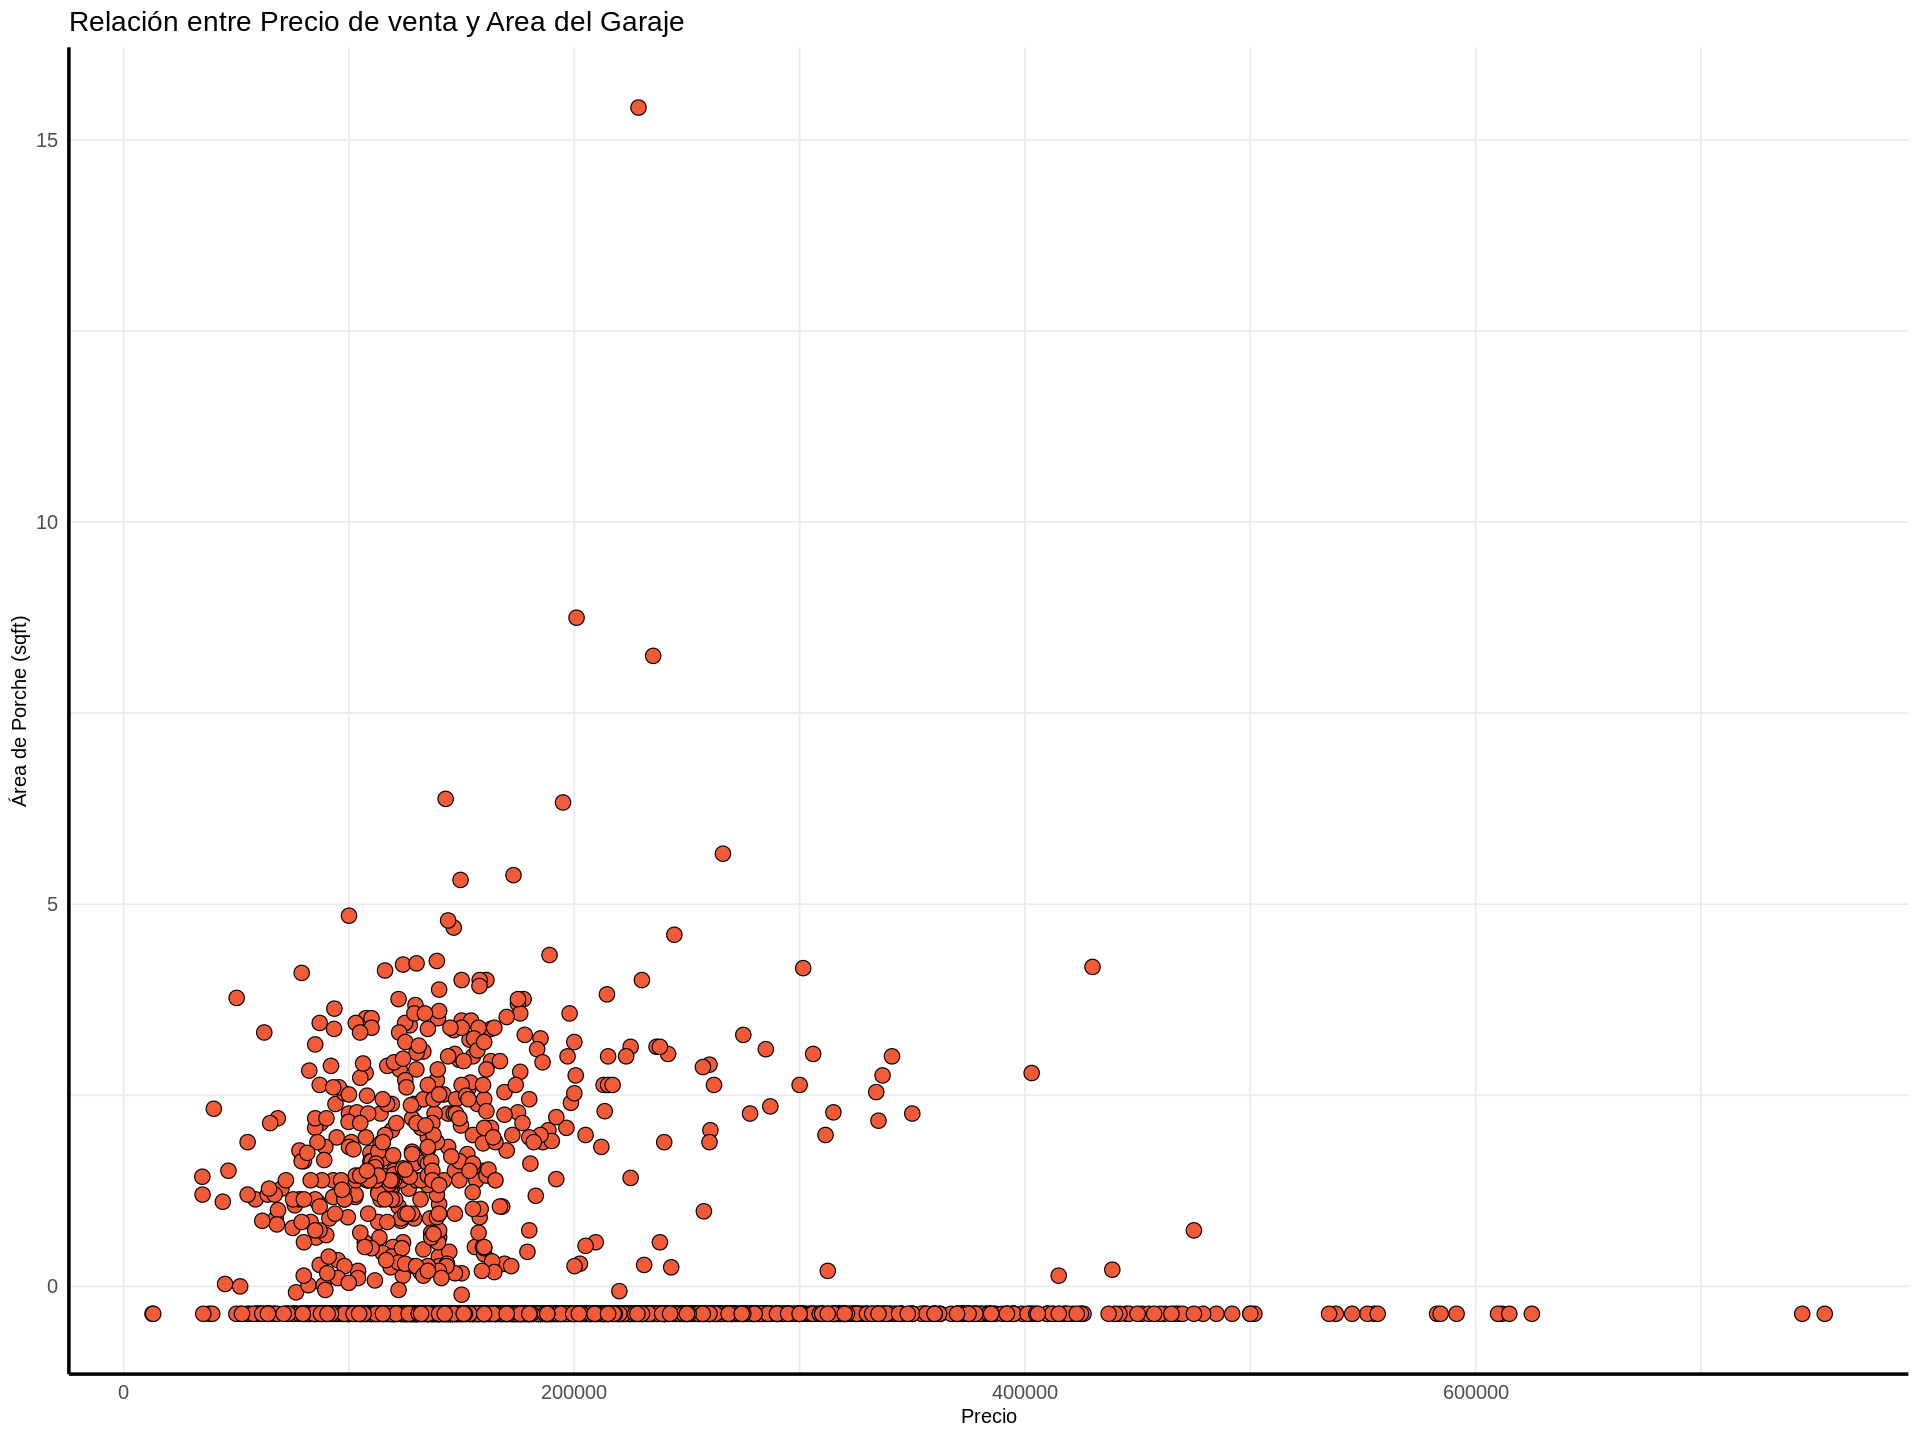

In [50]:
# Establecer DPI
dpi <- 300

# Crear el gráfico con ggplot2
mi_grafico <- ggplot(df, aes(x = sale_price, y = enclosed_porch)) +
  geom_point(shape = 21, fill = "#F25A38", size = 4) +  # Usar forma 21 (círculo con borde) y tamaño 4
  labs(x = "Precio", y = "Área de Porche (sqft)", title = "Relación entre Precio de venta y Area del Garaje") +  # Cambiar nombres de etiquetas y título
  theme_minimal(base_size = 14) +  # Tamaño de títulos
  theme(axis.title.x = element_text(size = 12),  # Tamaño del título del eje x
        axis.title.y = element_text(size = 12),  # Tamaño del título del eje y
        axis.text = element_text(size = 12),  # Tamaño del texto de los ejes
        axis.line = element_line(size = 1),  # Grosor de las líneas de los ejes
        panel.grid.major = element_line(size = 0.5),  # Grosor de las líneas de la cuadrícula mayor
        panel.grid.minor = element_line(size = 0.5))  # Grosor de las líneas de la cuadrícula menor

# Guardar el gráfico en un archivo PNG con el DPI especificado
ggsave("mi_grafico.png", plot = mi_grafico, bg = "white", dpi = dpi)
print(mi_grafico)

#Coeficientes de correlación

In [52]:
#Coeficiente de correlación entre SalePrice, OverallQuality, 2nd FLoor SF, GR Liv Area
print("Correlación SalesPrice / Overall Qual")
cor(df$sale_price, df$overall_qual)
print("Correlación SalesPrice / 2nd Floor SF")
cor(df$sale_price, df$X2nd_flr_sf)
print("Correlación SalesPrice / Gr Liv Area")
cor(df$sale_price, df$gr_liv_area)

[1] "Correlación SalesPrice / Overall Qual"


[1] 0.7992618

[1] "Correlación SalesPrice / 2nd Floor SF"


[1] 0.2693734

[1] "Correlación SalesPrice / Gr Liv Area"


[1] 0.7067799

#Grafico de disperción

`geom_smooth()` using formula = 'y ~ x'


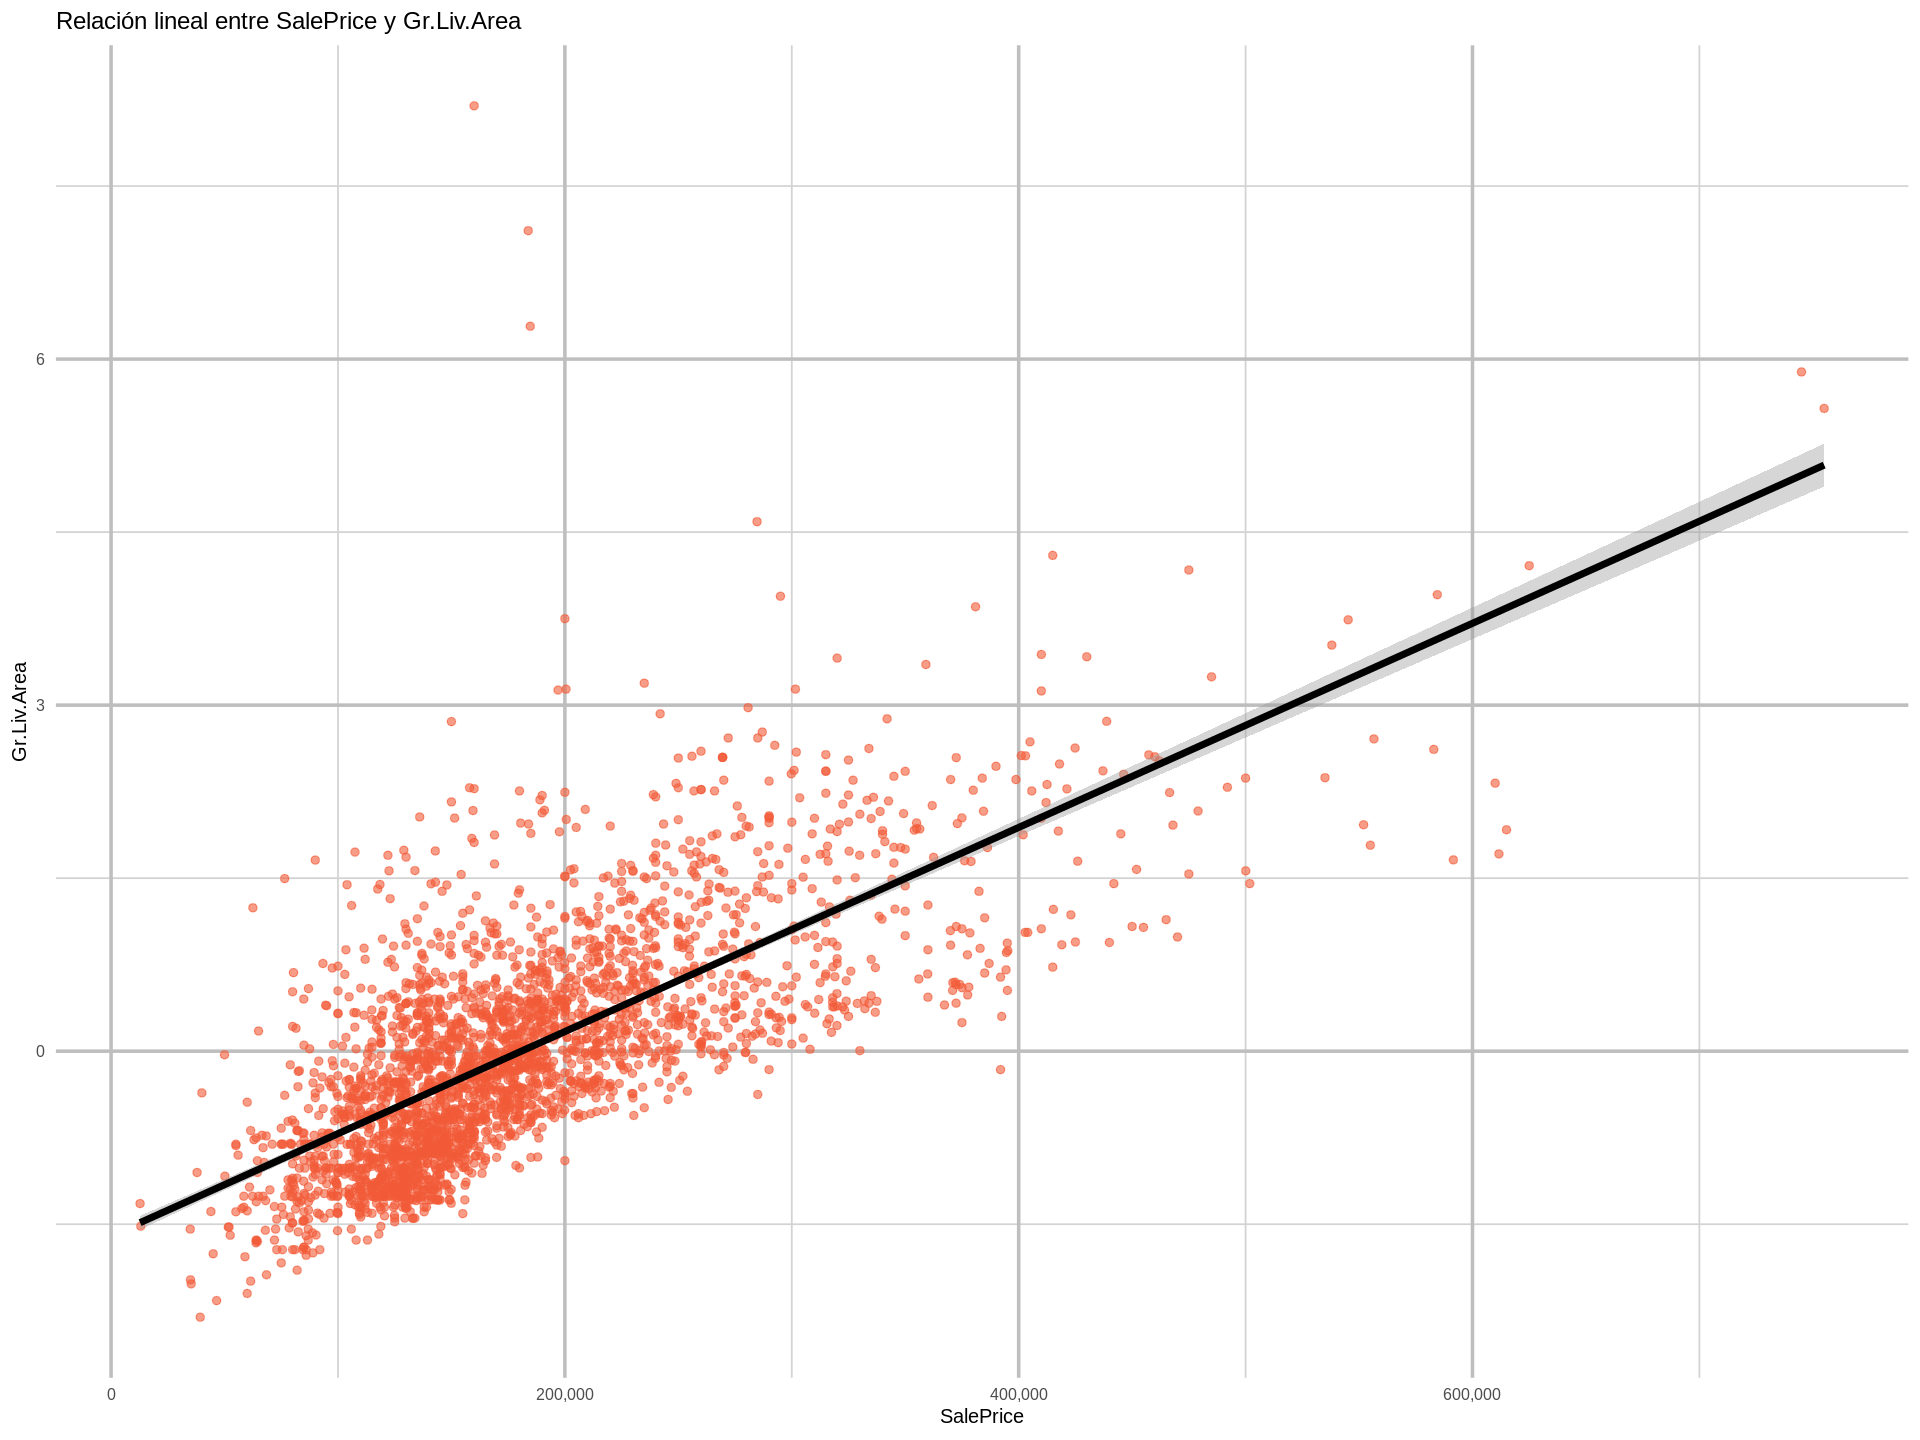

In [53]:
# Supongamos que df es tu dataframe
ggplot(df, aes(sale_price, gr_liv_area)) +
  geom_point(size = 2, color = "#F25A38", alpha = 0.6) +
  theme_minimal(base_size = 14) +  # Ajusta el tamaño de los títulos
  geom_smooth(method = lm, color = "black", size = 2) +
  scale_x_continuous(labels = scales::comma_format()) +  # Utiliza scales::comma_format()
  labs(title = "Relación lineal entre SalePrice y Gr.Liv.Area",
       x = "SalePrice",
       y = "Gr.Liv.Area") +
  theme(
    text = element_text(size = 12),  # Ajusta el tamaño de texto general
    axis.title.x = element_text(size = 12),  # Ajusta el tamaño del título del eje x
    axis.title.y = element_text(size = 12),  # Ajusta el tamaño del título del eje y
    panel.grid.major = element_line(size = 1, color = "gray"),  # Ajusta las líneas de la cuadrícula
    panel.grid.minor = element_line(size = 0.5, color = "lightgray")  # Ajusta las líneas de la cuadrícula
  )


#Matriz de correlación (variables con mayor coorelación)

               Var1           Var2       Freq
4800    garage_cars    garage_area  0.8898660
1840   exterior_1st   exterior_2nd  0.8654165
5600      pool_area        pool_qc -0.8146646
4233    gr_liv_area  totrms_abvgrd  0.8077721
3356  total_bsmt_sf    X1st_flr_sf  0.8004287
6179   overall_qual     sale_price  0.7992618
1107    ms_subclass      bldg_type  0.7435622
2800 bsmtfin_type_2   bsmtfin_sf_2 -0.7311140
4480     fireplaces   fireplace_qu -0.7293215
6208    gr_liv_area     sale_price  0.7067799
4238  bedroom_abvgr  totrms_abvgrd  0.6726472
3599    X2nd_flr_sf    gr_liv_area  0.6552512
4135     exter_qual   kitchen_qual  0.6535235
2000   mas_vnr_type   mas_vnr_area -0.6515127
6189     exter_qual     sale_price -0.6476163
6222    garage_cars     sale_price  0.6475616
3668   bsmtfin_sf_1 bsmt_full_bath  0.6402117
6223    garage_area     sale_price  0.6401383
2231     year_built     foundation  0.6366324
2071   overall_qual     exter_qual -0.6331484
6200  total_bsmt_sf     sale_price

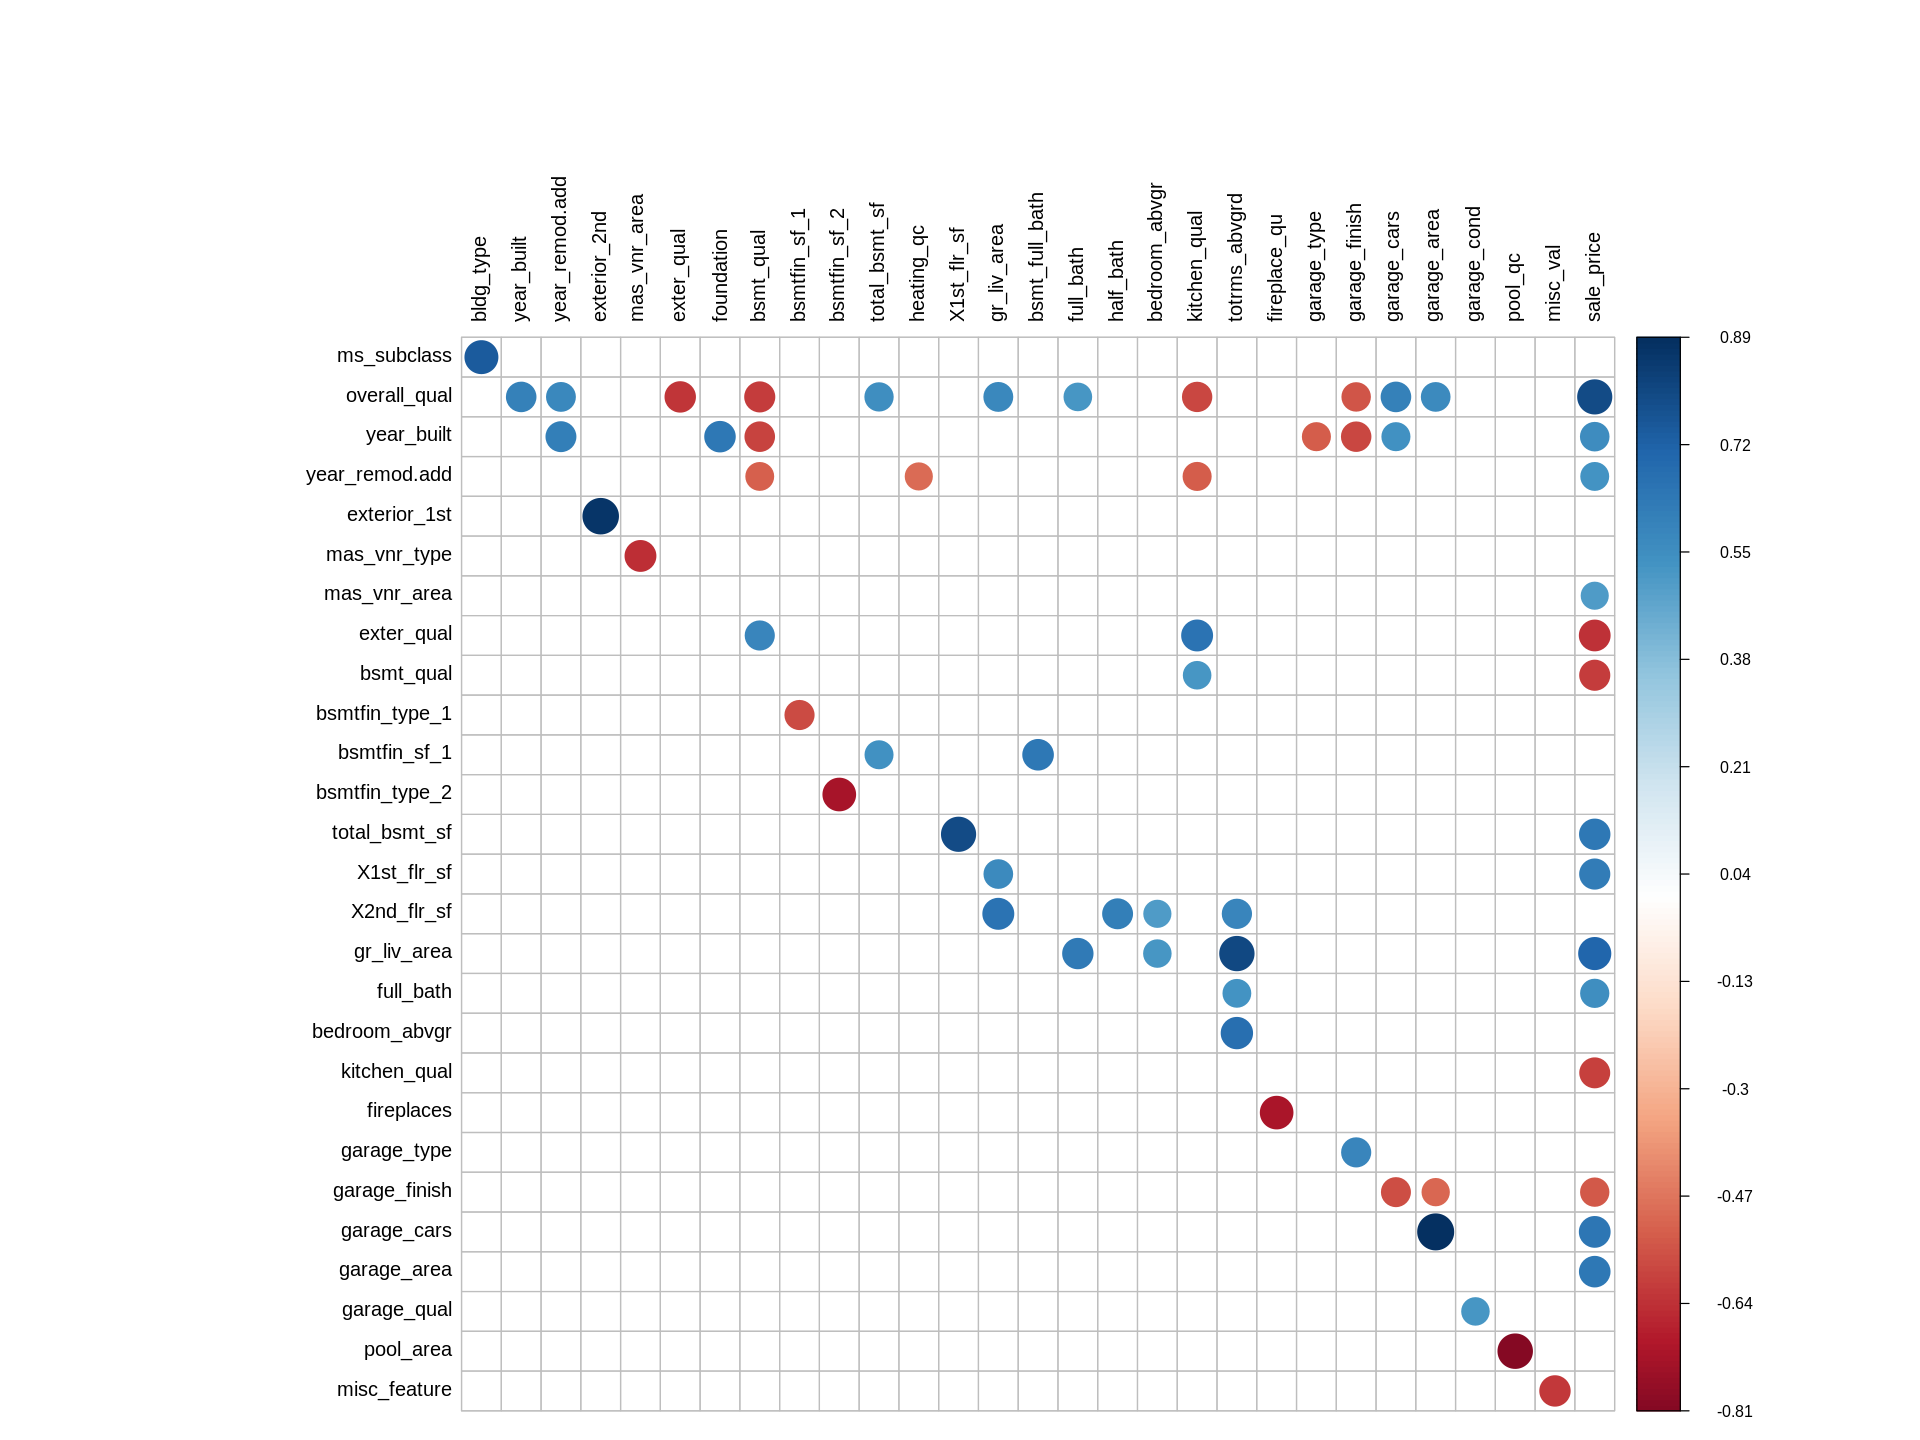

In [56]:
# Función para calcular correlaciones y visualizarlas
corr_simple <- function(data = df, sig = 0.5) {
  # Convertir los datos a numéricos para calcular correlaciones
  # Convertir primero a factor para mantener la integridad de los datos: cada valor se convertirá en un número en lugar de convertirse en NA
  df_cor <- data %>% mutate_if(is.character, as.factor)
  df_cor <- df_cor %>% mutate_if(is.factor, as.numeric)

  # Calcular correlaciones y eliminar las no significativas
  corr <- cor(df_cor)

  # Preparar para eliminar duplicados y correlaciones de 1
  corr[lower.tri(corr, diag = TRUE)] <- NA

  # Eliminar correlaciones perfectas
  corr[corr == 1] <- NA

  # Convertir a un marco de datos de 3 columnas
  corr <- as.data.frame(as.table(corr))

  # Eliminar los valores NA
  corr <- na.omit(corr)

  # Seleccionar valores significativos
  corr <- subset(corr, abs(Freq) > sig)

  # Ordenar por correlación más alta
  corr <- corr[order(-abs(corr$Freq)),]

  # Imprimir la tabla de correlaciones
  print(corr)

  # Convertir corr de nuevo a matriz para trazar con corrplot
  mtx_corr <- reshape2::acast(corr, Var1 ~ Var2, value.var = "Freq")

  # Visualizar las correlaciones con corrplot
  corrplot(mtx_corr, is.corr = FALSE, tl.col = "black", na.label = " ")
}

# Llamar a la función para calcular y visualizar correlaciones
corr_simple()


#Analisis Exploratorio con datos procesados

## DataFrame procesado

In [57]:
# URL del archivo CSV
processed_data <- "https://raw.githubusercontent.com/FerMarz/ames-housing-2023/main/data/AmesHousing_processed_data.csv"

# Leer el archivo CSV
df <- read.csv(processed_data)

# Mostrando las primeras filas
head(df)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,⋯,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,sale_price
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,-0.87700484,5,2.4885922,2.74438073,1,2,0,3,0,0,⋯,-0.06303105,4,4,5,-0.08942228,-0.44805744,1.678499,9,4,215000
2,-0.87700484,4,0.6673554,0.18709726,1,2,3,3,0,4,⋯,-0.06303105,4,2,5,-0.08942228,-0.07960156,1.678499,9,4,105000
3,-0.87700484,5,0.6972118,0.52281370,1,2,0,3,0,0,⋯,-0.06303105,4,4,1,21.98572514,-0.07960156,1.678499,9,4,172000
4,-0.87700484,5,1.0554879,0.12845795,1,2,3,3,0,0,⋯,-0.06303105,4,4,5,-0.08942228,-0.81651332,1.678499,9,4,244000
5,0.06128506,5,0.4882174,0.46734751,1,2,0,3,0,4,⋯,-0.06303105,4,2,5,-0.08942228,-1.18496920,1.678499,9,4,189900
6,0.06128506,5,0.6076428,-0.02156732,1,2,0,3,0,4,⋯,-0.06303105,4,4,5,-0.08942228,-0.07960156,1.678499,9,4,195500


#Matriz de correlación con datos procesados

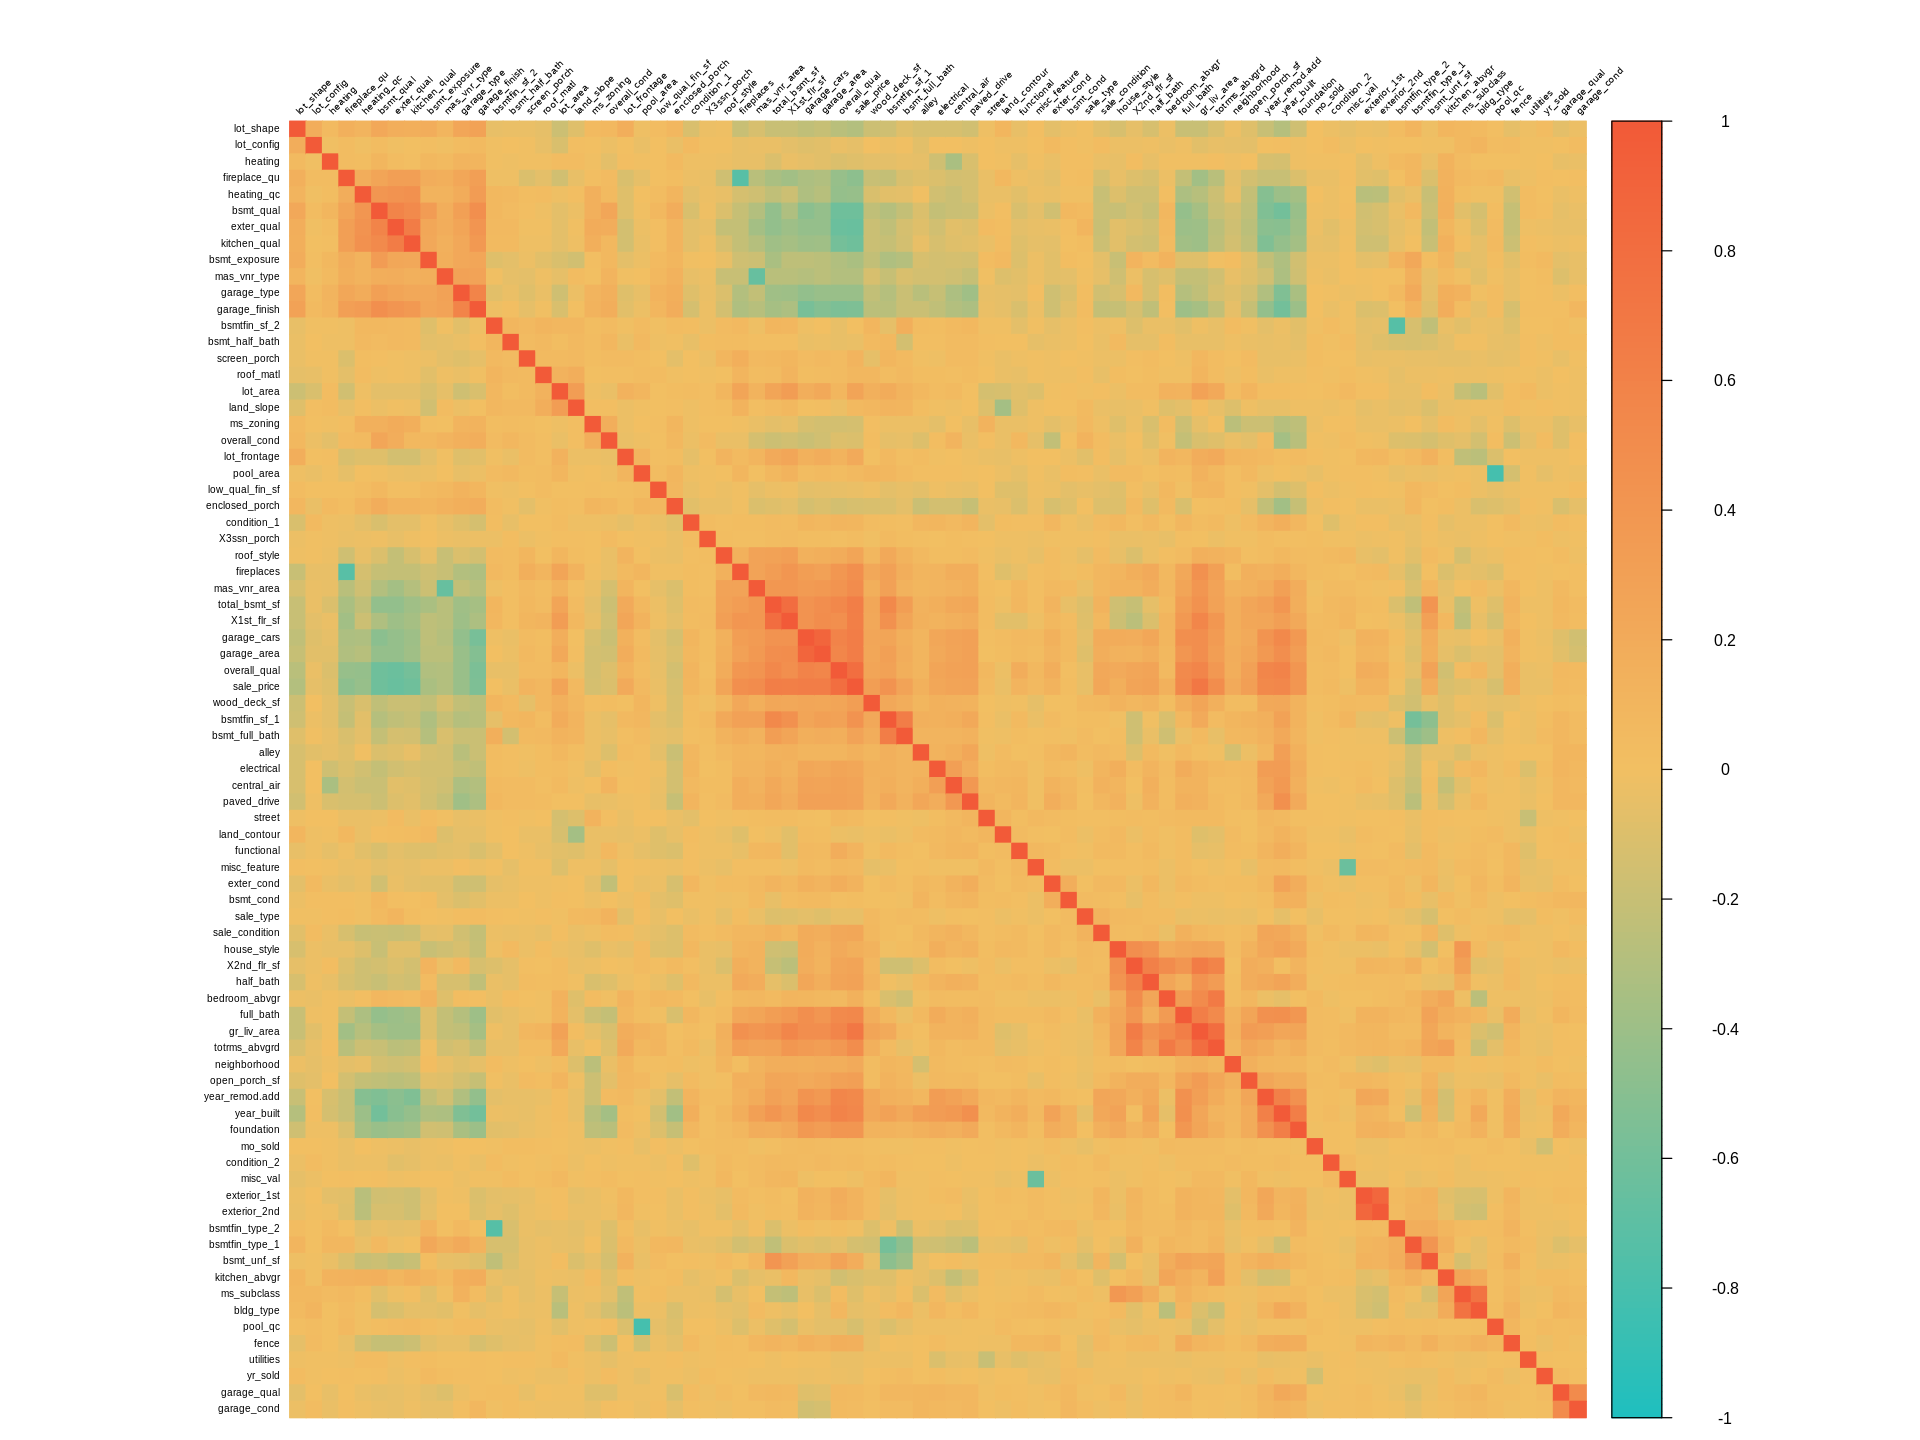

In [ ]:
# Solo variables numéricas
numeric <- df %>% select(where(is.numeric))

# Calcular la matriz de correlación
cor_matrix <- cor(numeric)

# Crear una paleta de colores personalizada
colores_personalizados <- colorRampPalette(c("#1FBFBF", "#F2C063", "#F25A38"))

# Generar el gráfico de correlación con la paleta de colores personalizada
corrplot(cor_matrix,
         method = "color",
         order = "hclust",
         hclust.method = "complete",
         tl.cex = 0.5, # Tamaño del texto
         tl.col = "black",
         tl.srt = 45, # Inclinación del texto superior
         col = colores_personalizados(200)) # Partición del gradiente de color

##Variables con fuerte correlación

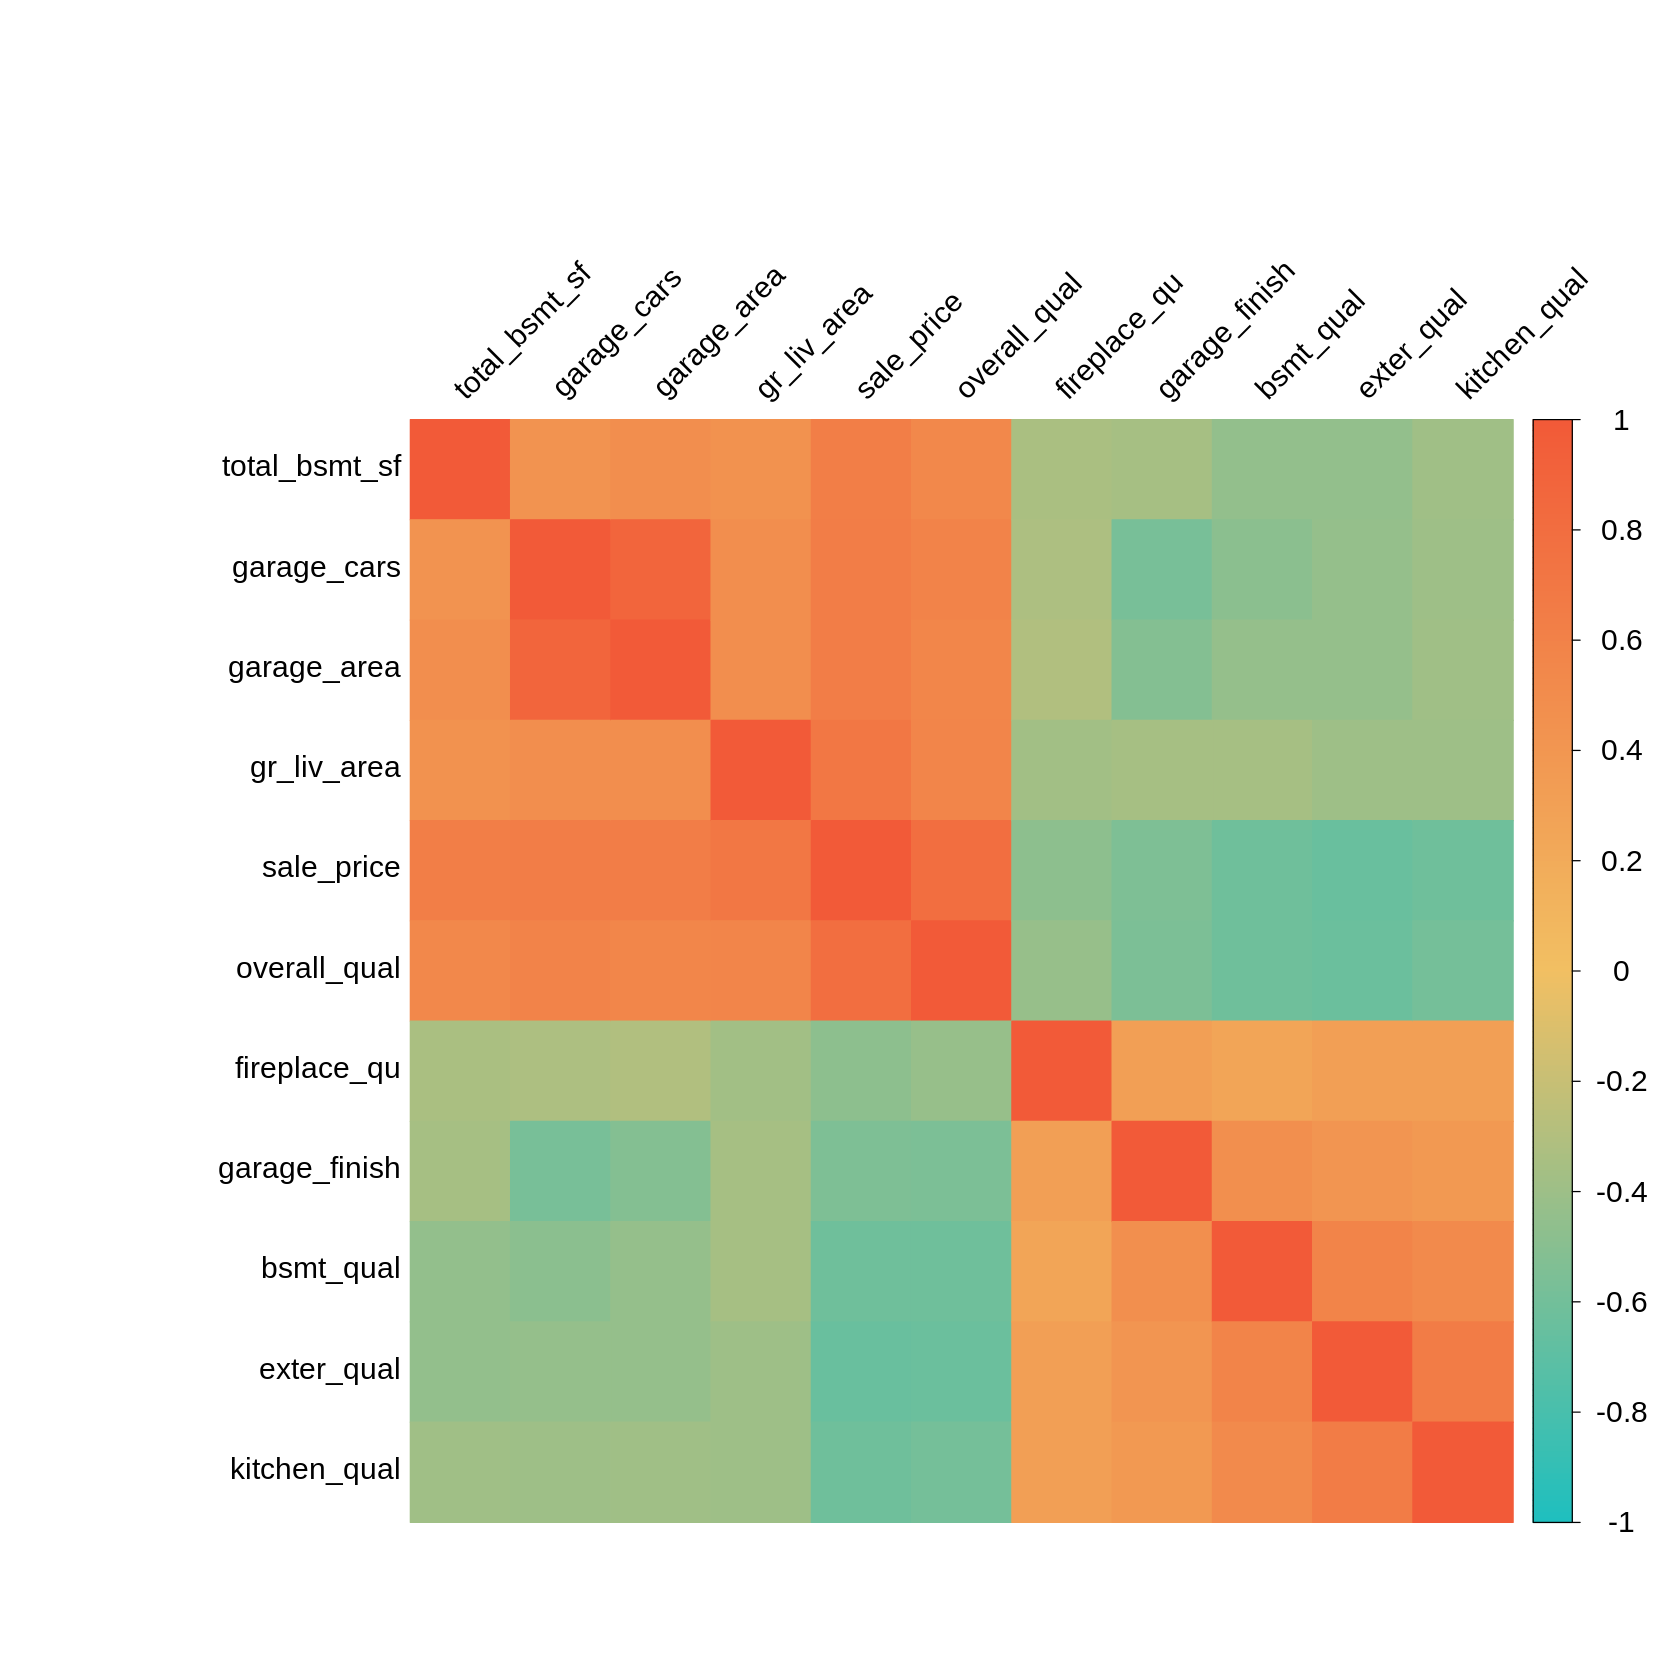

In [ ]:
# Selección de variables
new_df = numeric %>% select(sale_price, overall_qual, gr_liv_area, garage_cars, garage_area, total_bsmt_sf, exter_qual, bsmt_qual, kitchen_qual, garage_finish, fireplace_qu)
# Calcular la matriz de correlación
cor_matrix <- cor(new_df)

options(repr.plot.width = 14, repr.plot.height = 14)
# Generar el gráfico de correlación con la paleta de colores personalizada
corrplot(cor_matrix,
         method = "color",
         order = "hclust",
         hclust.method = "complete",
         tl.cex = 1.5, # Tamaño del texto de las etiquetas
         tl.col = "black",
         tl.srt = 45, # Inclinación del texto superior
         col = colores_personalizados(200), # Partición del gradiente de color
         cl.cex = 1.5) # Aumentar el tamaño del texto de la barra de colores
# mtext("Variables con fuerte correlación", at=6.5, line=-5, cex=4)